In [2]:
import dlib, cv2 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as path_effects

detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat') #이거 처음에 tar zip으로 압축되어있어서 안불러짐 7zip으로 압축풀었더니 됨
facerec = dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat') #이거 model에 들어있는거 다운받으면 안되고 밑으로 쭉 내렸더니 쓰인 모델 2개 다운받는곳에 있었더니 됨

In [3]:
def find_faces(img):
    dets = detector(img, 1)

    if len(dets) == 0:
        return np.empty(0), np.empty(0), np.empty(0)
    
    rects, shapes = [], []
    shapes_np = np.zeros((len(dets), 68, 2), dtype=np.int)
    for k, d in enumerate(dets):
        rect = ((d.left(), d.top()), (d.right(), d.bottom()))
        rects.append(rect)

        shape = sp(img, d)
        
        # convert dlib shape to numpy array
        for i in range(0, 68):
            shapes_np[k][i] = (shape.part(i).x, shape.part(i).y)

        shapes.append(shape)
        
    return rects, shapes, shapes_np

def encode_faces(img, shapes):
    face_descriptors = []
    for shape in shapes:
        face_descriptor = facerec.compute_face_descriptor(img, shape)
        face_descriptors.append(np.array(face_descriptor))

    return np.array(face_descriptors)

# Compute Saved Face Descriptions

In [7]:
img_paths = {
    'Lee Sun-kyun': 'sunkyun.jpg',  #인물 4명에서 2명으로 줄임 
    'IU': 'iu.jpg'

}

descs = {
    'Lee Sun-kyun': None,
    'IU': None
}

for name, img_path in img_paths.items():
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    _, img_shapes, _ = find_faces(img_rgb)
    descs[name] = encode_faces(img_rgb, img_shapes)[0]

np.save('descs.npy', descs)
print(descs)

C:\Users\shjo\AppData\Local\Temp\ipykernel_3520\4042868960.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  shapes_np = np.zeros((len(dets), 68, 2), dtype=np.int)


{'Lee Sun-kyun': array([-0.02963183,  0.11593962,  0.06373045,  0.0067994 , -0.08750253,
        0.01341268, -0.07511942, -0.14993793,  0.07115294, -0.14408669,
        0.21550912, -0.04881968, -0.21019654, -0.06660261,  0.00413095,
        0.19929659, -0.17291999, -0.14336051, -0.06364123, -0.05675129,
        0.02441401,  0.04622187, -0.00184474,  0.02561431, -0.08428033,
       -0.31224236, -0.10532613, -0.08462133,  0.05084147, -0.06156511,
       -0.15621369, -0.01229409, -0.18960847, -0.06762622,  0.0539052 ,
        0.084501  , -0.08665455, -0.07070719,  0.11977251, -0.01893014,
       -0.15456665,  0.08899214,  0.05953659,  0.2274293 ,  0.19300087,
        0.08013786,  0.01203732, -0.16591607,  0.12572761, -0.13584831,
        0.05131822,  0.14085801,  0.10288664,  0.12441664,  0.01225102,
       -0.12923387,  0.02972223,  0.07409828, -0.1002882 ,  0.04142967,
        0.14573409, -0.08232836, -0.01937325, -0.11103646,  0.24907815,
        0.0095386 , -0.10747495, -0.20480563,  

# Compute Input

In [8]:
img_bgr = cv2.imread('iu_sunkyun.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

rects, shapes, _ = find_faces(img_rgb)
descriptors = encode_faces(img_rgb, shapes)

C:\Users\shjo\AppData\Local\Temp\ipykernel_3520\4042868960.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  shapes_np = np.zeros((len(dets), 68, 2), dtype=np.int)


# Visualize Output

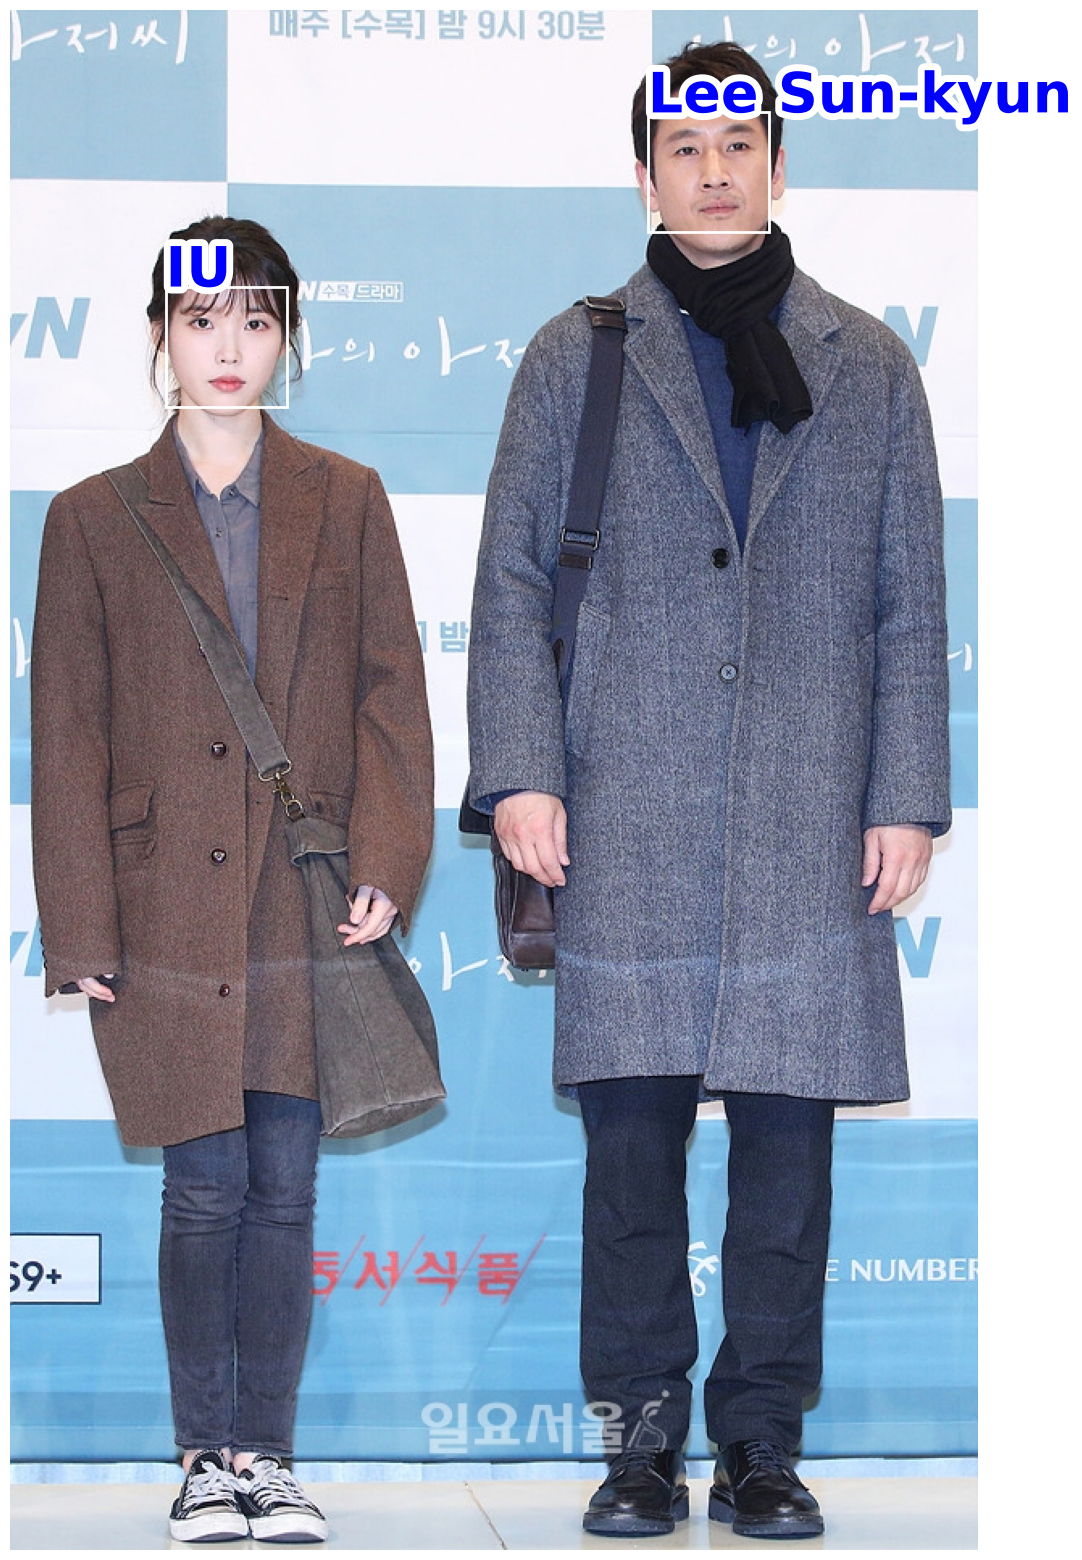

In [9]:
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.imshow(img_rgb)

for i, desc in enumerate(descriptors):
    
    found = False
    for name, saved_desc in descs.items():
        dist = np.linalg.norm([desc] - saved_desc, axis=1)

        if dist < 0.5:   #여기 6에서 5로 고침 인식하는 기준을 이걸로 조정하는건가 봄
            found = True

            text = ax.text(rects[i][0][0], rects[i][0][1], name,
                    color='b', fontsize=40, fontweight='bold')
            text.set_path_effects([path_effects.Stroke(linewidth=10, foreground='white'), path_effects.Normal()])
            rect = patches.Rectangle(rects[i][0],
                                 rects[i][1][1] - rects[i][0][1],
                                 rects[i][1][0] - rects[i][0][0],
                                 linewidth=2, edgecolor='w', facecolor='none')
            ax.add_patch(rect)

            break
    
    if not found:
        ax.text(rects[i][0][0], rects[i][0][1], 'unknown',
                color='r', fontsize=20, fontweight='bold')
        rect = patches.Rectangle(rects[i][0],
                             rects[i][1][1] - rects[i][0][1],
                             rects[i][1][0] - rects[i][0][0],
                             linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

plt.axis('off')
plt.show()

In [14]:
img_bgr = cv2.imread('other.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

rects, shapes, _ = find_faces(img_rgb)
descriptors = encode_faces(img_rgb, shapes)

C:\Users\shjo\AppData\Local\Temp\ipykernel_3520\4042868960.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  shapes_np = np.zeros((len(dets), 68, 2), dtype=np.int)


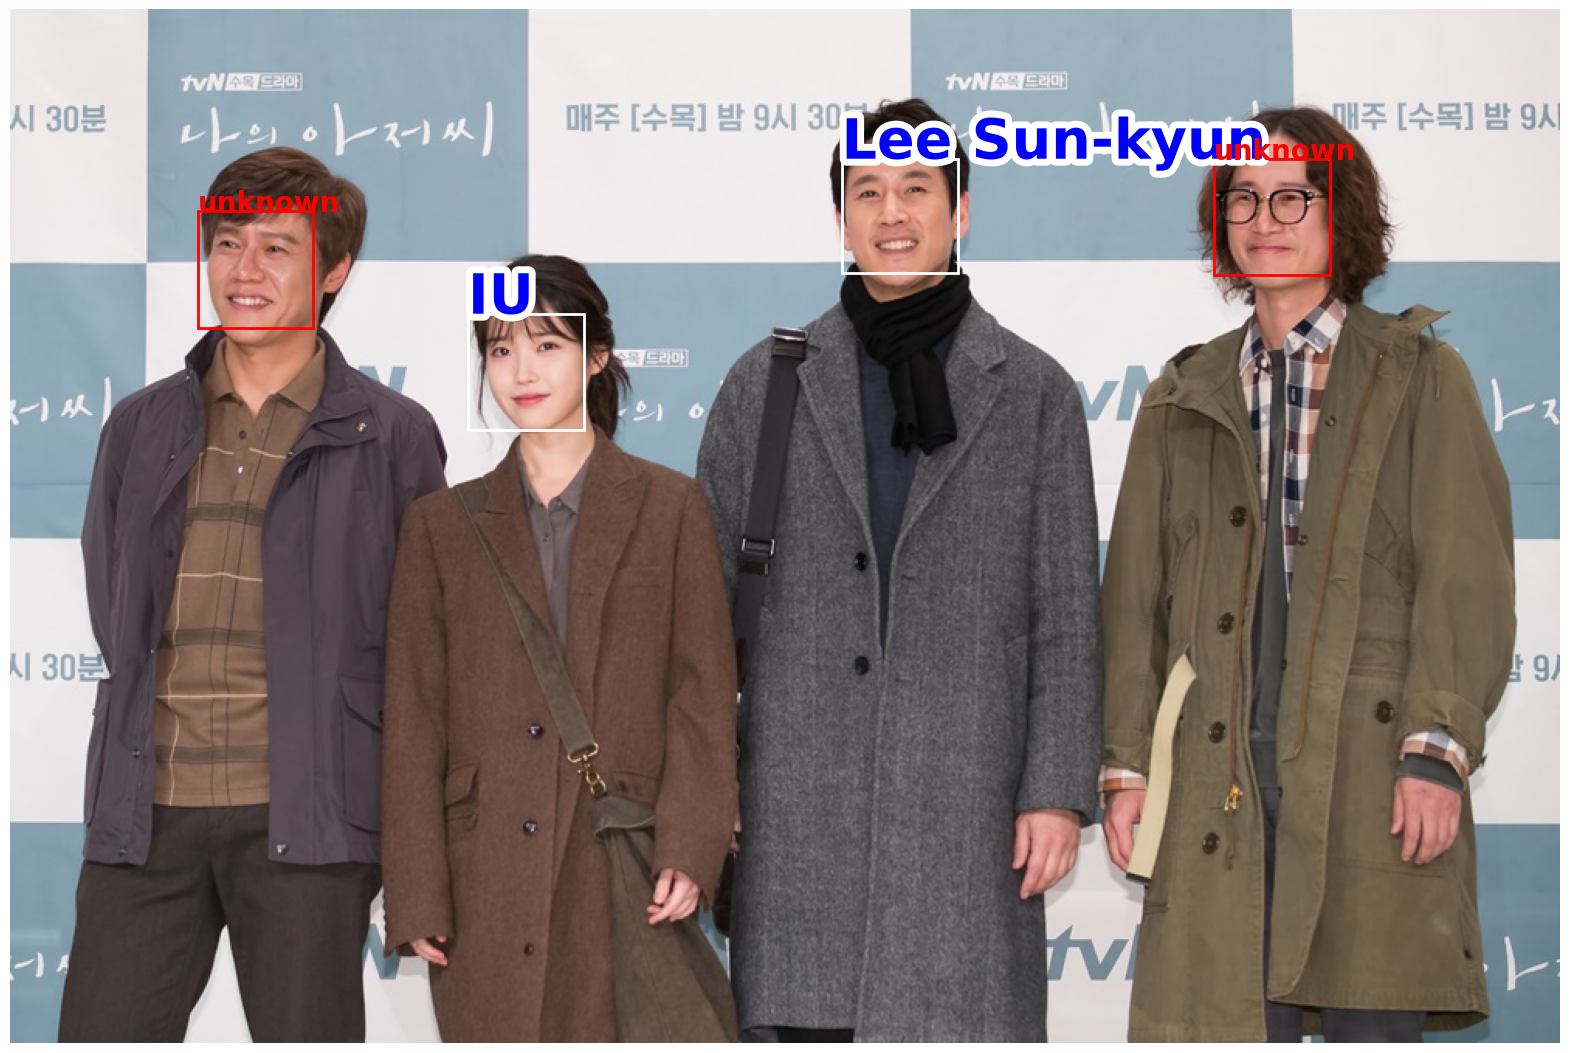

In [15]:
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.imshow(img_rgb)

for i, desc in enumerate(descriptors):
    
    found = False
    for name, saved_desc in descs.items():
        dist = np.linalg.norm([desc] - saved_desc, axis=1)

        if dist < 0.5:   #여기 6에서 5로 고침 인식하는 기준을 이걸로 조정하는건가 봄
            found = True

            text = ax.text(rects[i][0][0], rects[i][0][1], name,
                    color='b', fontsize=40, fontweight='bold')
            text.set_path_effects([path_effects.Stroke(linewidth=10, foreground='white'), path_effects.Normal()])
            rect = patches.Rectangle(rects[i][0],
                                 rects[i][1][1] - rects[i][0][1],
                                 rects[i][1][0] - rects[i][0][0],
                                 linewidth=2, edgecolor='w', facecolor='none')
            ax.add_patch(rect)

            break
    
    if not found:
        ax.text(rects[i][0][0], rects[i][0][1], 'unknown',
                color='r', fontsize=20, fontweight='bold')
        rect = patches.Rectangle(rects[i][0],
                             rects[i][1][1] - rects[i][0][1],
                             rects[i][1][0] - rects[i][0][0],
                             linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

plt.axis('off')
plt.show()